In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_data = pd.read_csv('/content/boston.csv')
df_data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


In [ ]:
  df_data.shape

(506, 15)

In [ ]:
df_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [ ]:
df_data.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [ ]:
df_data.isna().values.any()

False

In [ ]:
df_data.duplicated().values.any()

False

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [ ]:
df_data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.00,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,126.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,252.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,378.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,505.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [ ]:
df_data_sort = df_data.sort_values('PRICE',ascending=False)
df_data_sort

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
283,283,0.02,90.00,1.21,1.00,0.40,7.92,24.80,5.88,1.00,198.00,13.60,395.52,3.16,50.00
225,225,0.53,0.00,6.20,0.00,0.50,8.72,83.00,2.89,8.00,307.00,17.40,382.00,4.63,50.00
369,369,5.67,0.00,18.10,1.00,0.63,6.68,96.80,1.36,24.00,666.00,20.20,375.33,3.73,50.00
370,370,6.54,0.00,18.10,1.00,0.63,7.02,97.50,1.20,24.00,666.00,20.20,392.05,2.96,50.00
371,371,9.23,0.00,18.10,0.00,0.63,6.22,100.00,1.17,24.00,666.00,20.20,366.15,9.53,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,45.75,0.00,18.10,0.00,0.69,4.52,100.00,1.66,24.00,666.00,20.20,88.27,36.98,7.00
399,399,9.92,0.00,18.10,0.00,0.69,5.85,77.80,1.50,24.00,666.00,20.20,338.16,29.97,6.30
400,400,25.05,0.00,18.10,0.00,0.69,5.99,100.00,1.59,24.00,666.00,20.20,396.90,26.77,5.60
398,398,38.35,0.00,18.10,0.00,0.69,5.45,100.00,1.49,24.00,666.00,20.20,396.90,30.59,5.00


In [ ]:
df_data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
df_data.count()

Unnamed: 0    506
CRIM          506
ZN            506
INDUS         506
CHAS          506
NOX           506
RM            506
AGE           506
DIS           506
RAD           506
TAX           506
PTRATIO       506
B             506
LSTAT         506
PRICE         506
dtype: int64

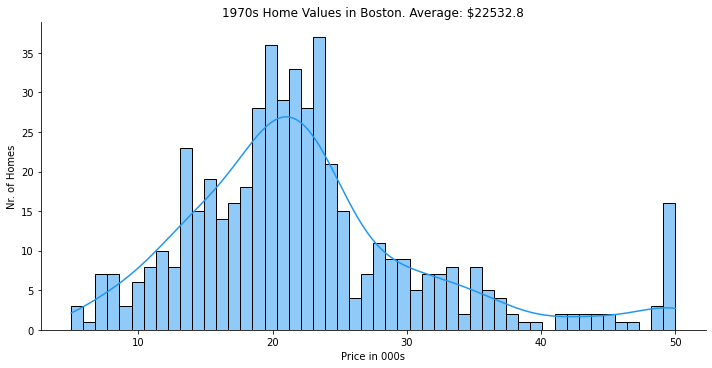

In [ ]:
sns.displot(df_data['PRICE'],bins=50,aspect=2,kde=True,color='#2196f3')
plt.title(f'1970s Home Values in Boston. Average: ${(1000*df_data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

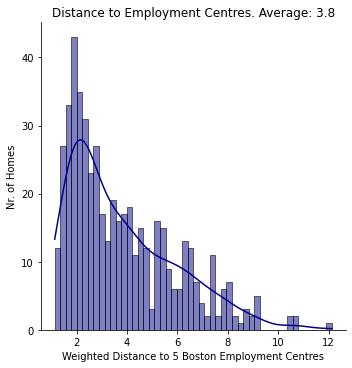

In [ ]:
sns.displot(df_data.DIS,bins=50,kde=True,color="darkblue")
plt.title(f'Distance to Employment Centres. Average: {(df_data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()



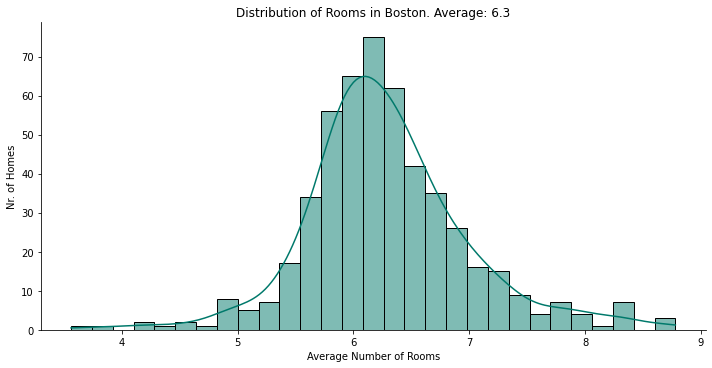

In [ ]:
sns.displot(df_data.RM,kde=True,aspect=2,color="#00796b")
plt.title(f'Distribution of Rooms in Boston. Average: {df_data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

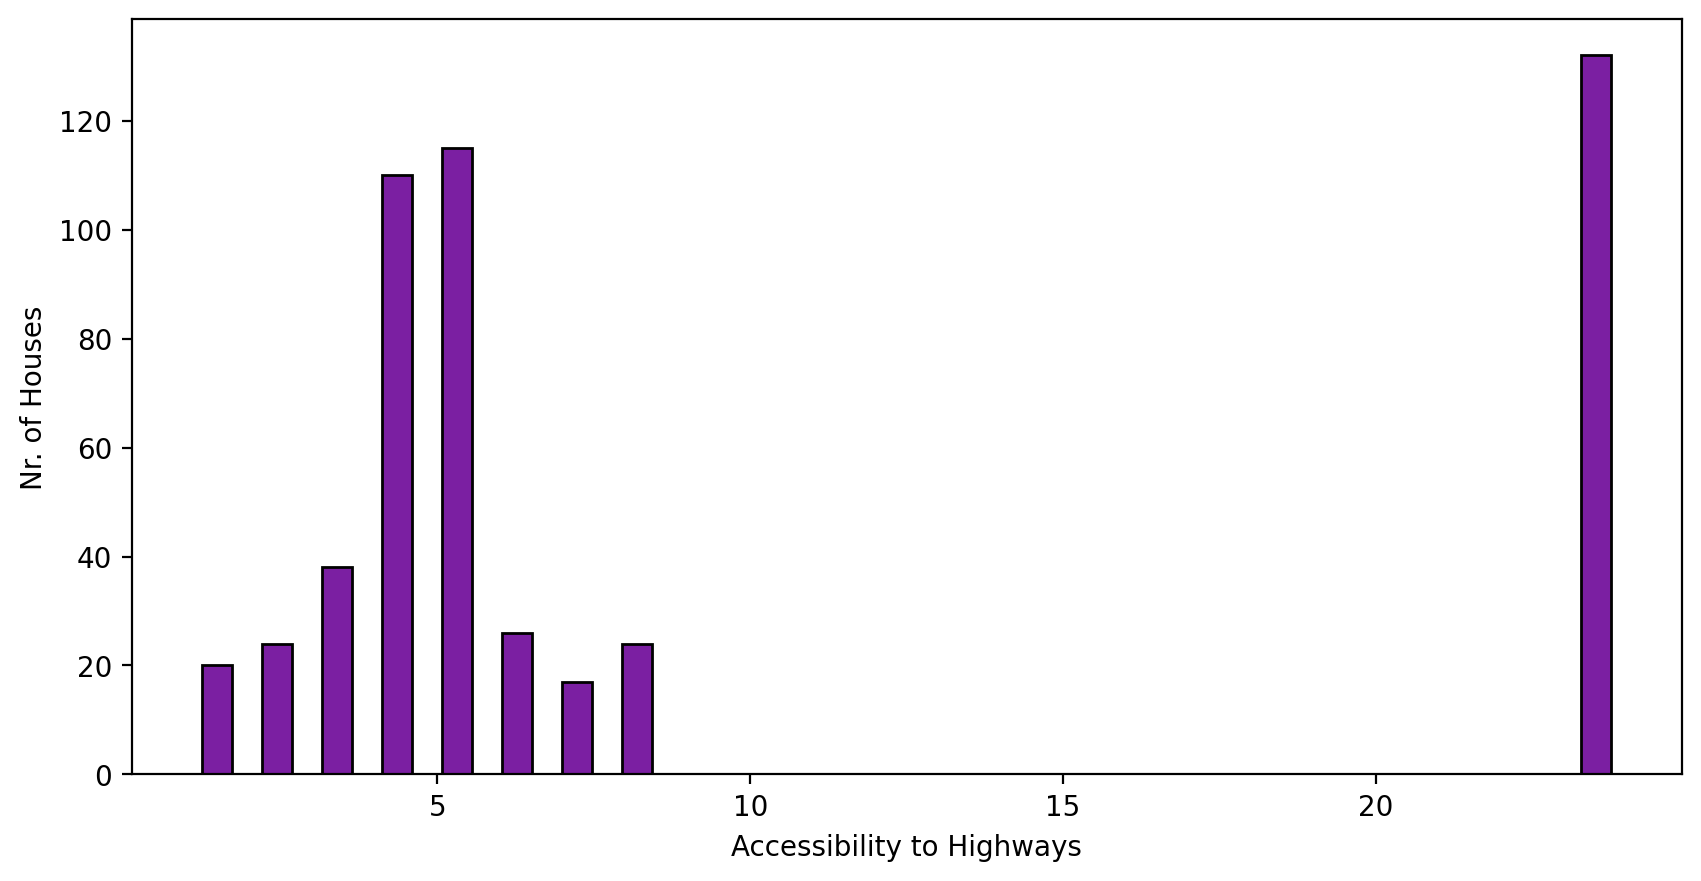

In [ ]:
plt.figure(figsize=(10,5),dpi=200)

plt.hist(df_data['RAD'],bins=24,ec='black',color='#7b1fa2',rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [ ]:
river_access = df_data['CHAS'].value_counts()
bar = px.bar(x=['No','Yes'],y=river_access.values,color=river_access.values,color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

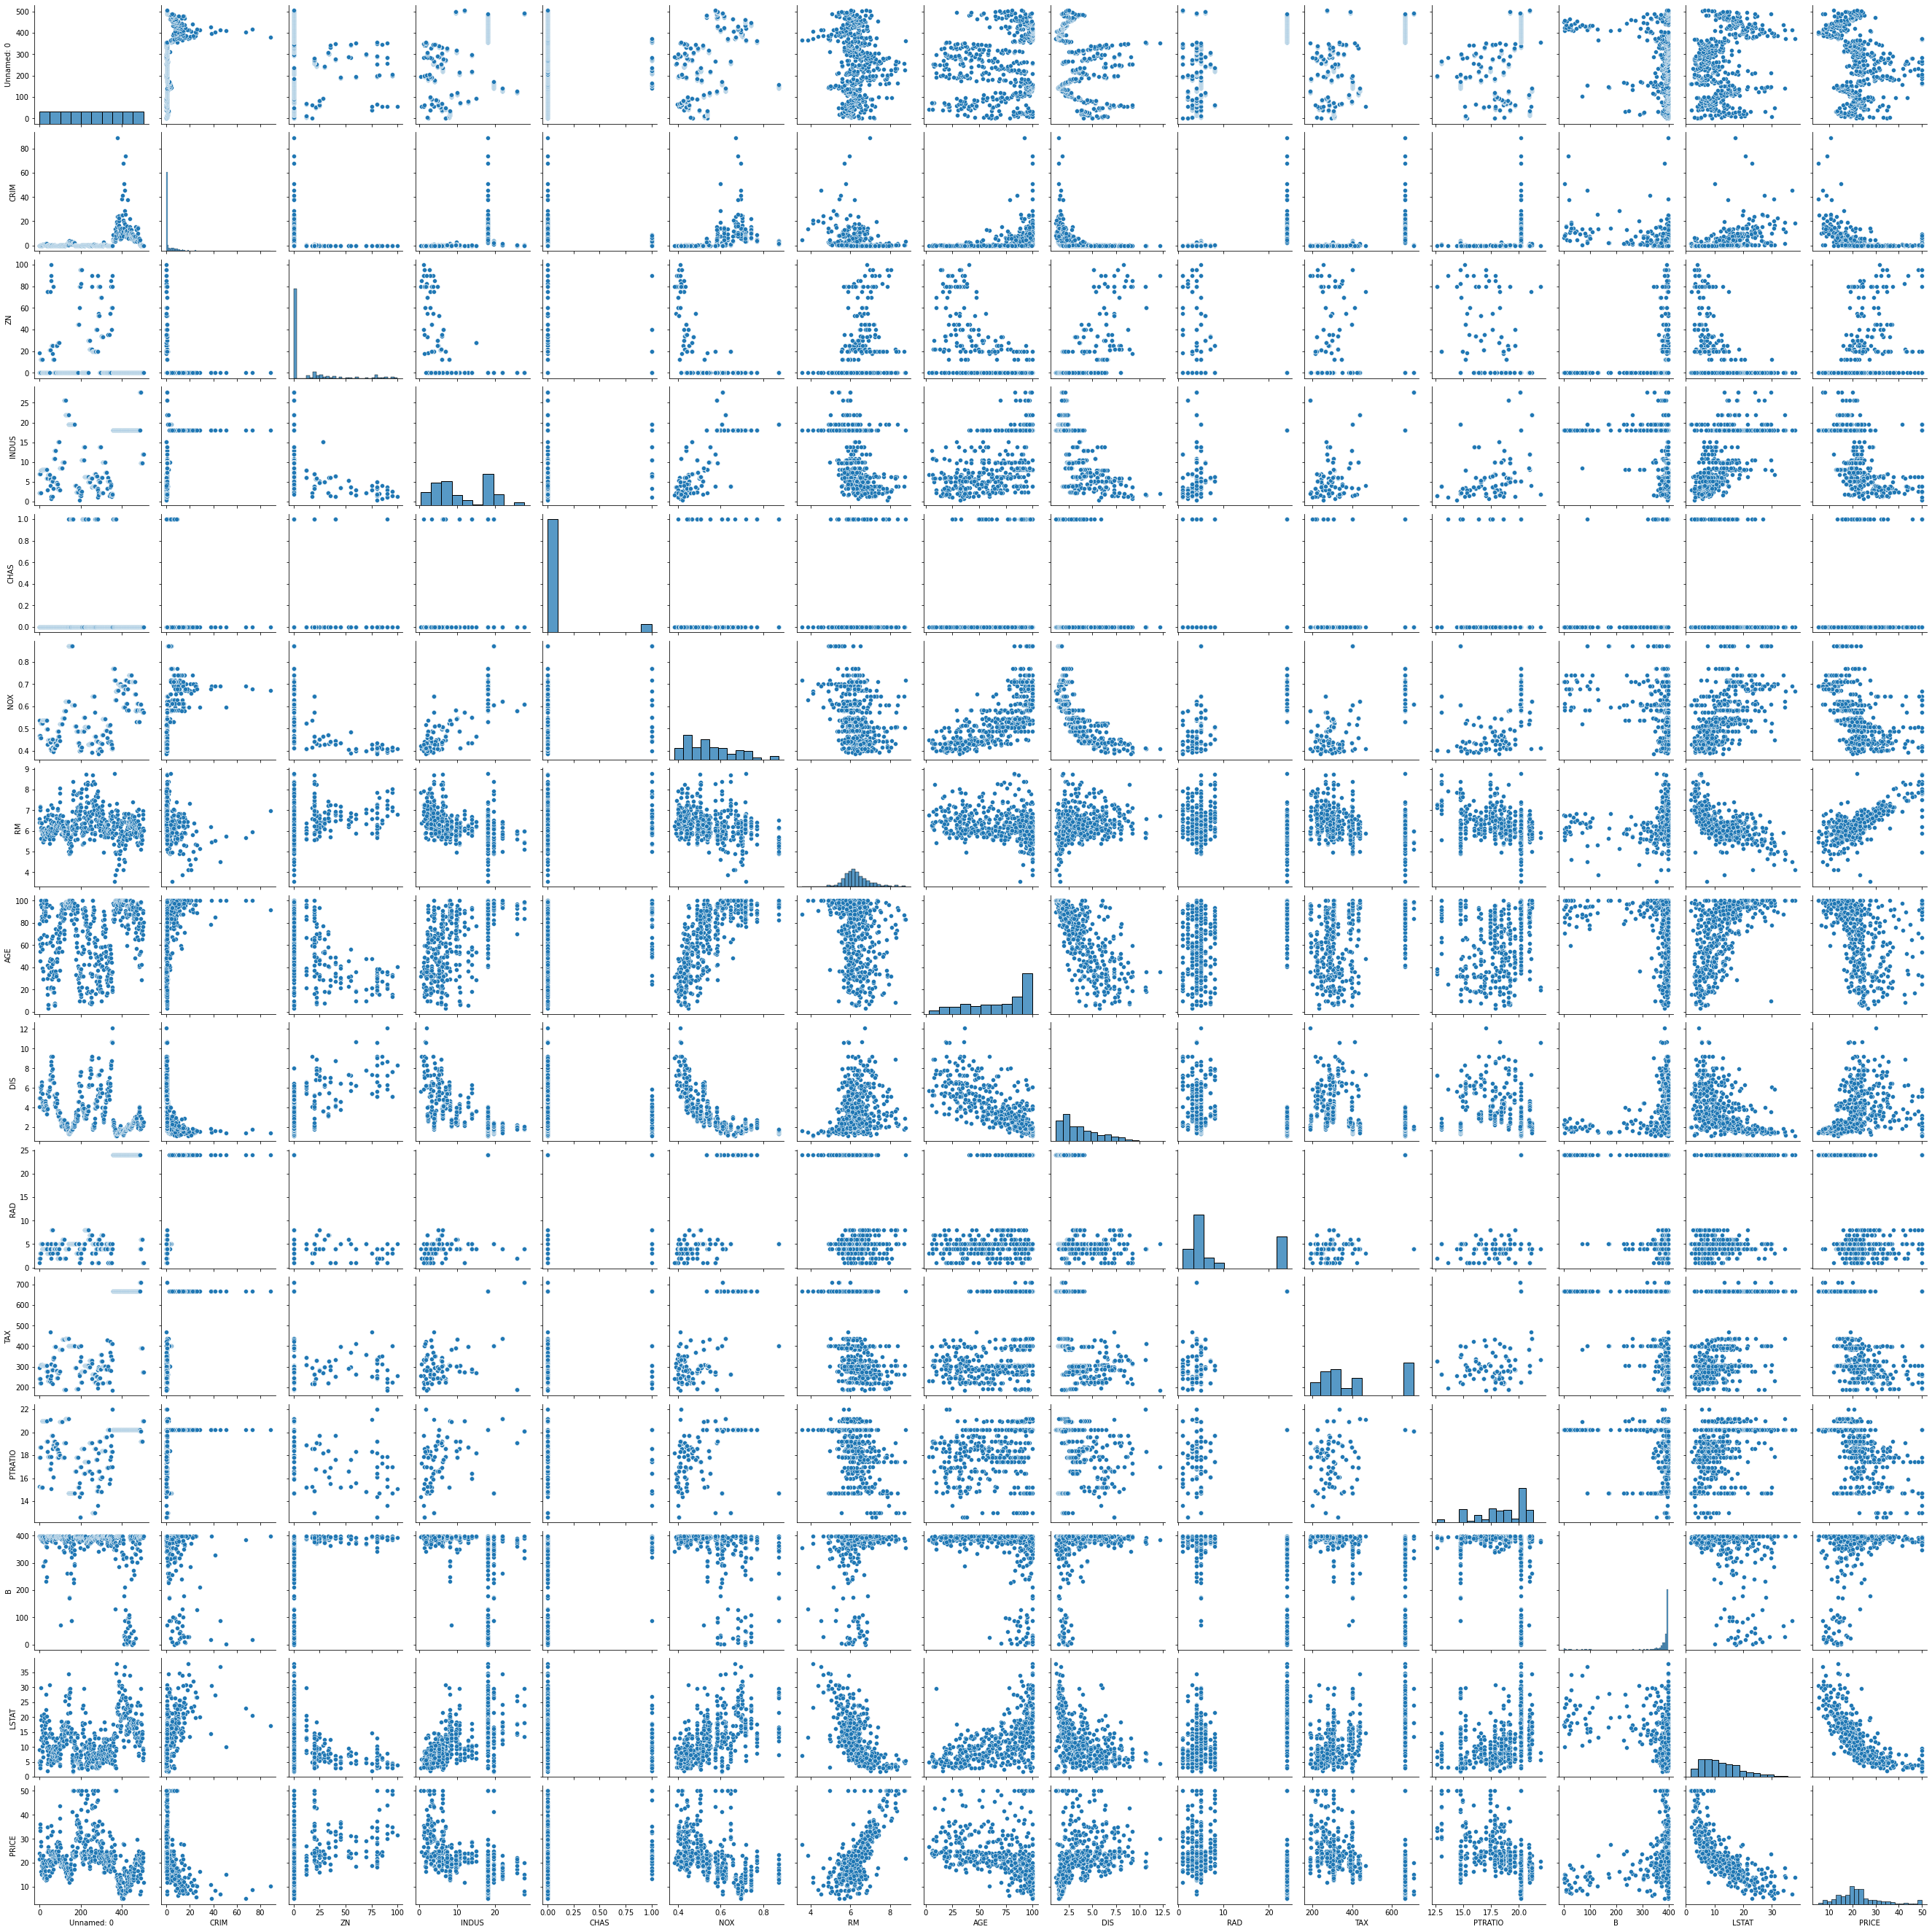

In [ ]:
sns.pairplot(df_data)
plt.show()

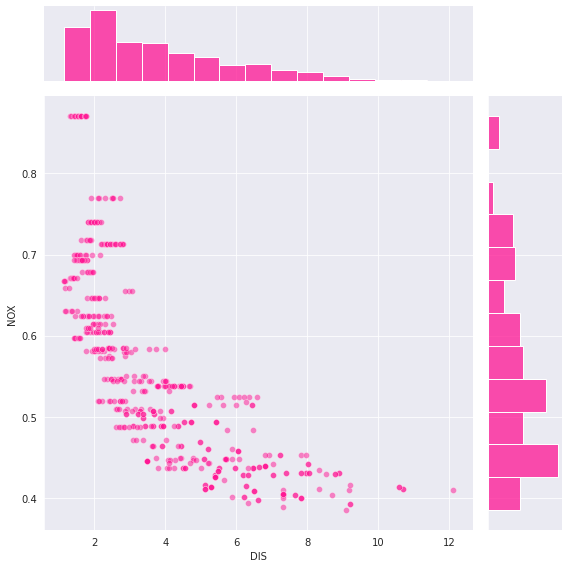

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['DIS'],y=df_data['NOX'],height=8,kind='scatter',color='deeppink',joint_kws={'alpha':0.5})

plt.show()  

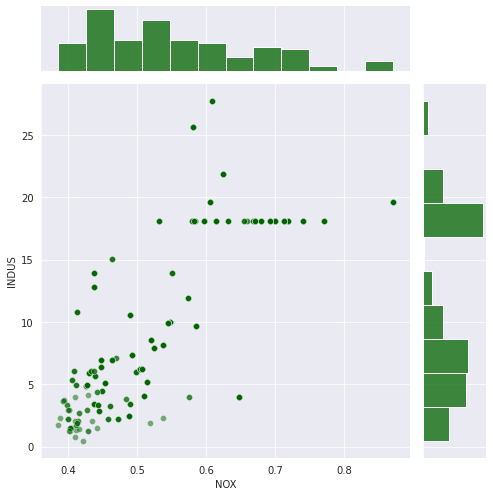

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data.NOX,y=df_data.INDUS,height=7,color='darkgreen',joint_kws={'alpha':0.5})

plt.show()  

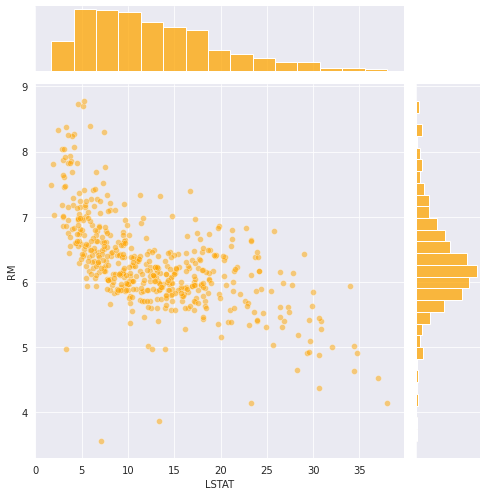

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['LSTAT'],y=df_data['RM'],height=7,color='orange',joint_kws={'alpha':0.5})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



<Figure size 2000x1000 with 0 Axes>

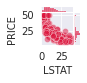

In [ ]:
plt.figure(figsize=(10,5),dpi=200)
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data.LSTAT,y=df_data.PRICE,height=0.7,color='crimson',joint_kws={'alpha':0.5})

plt.show()  

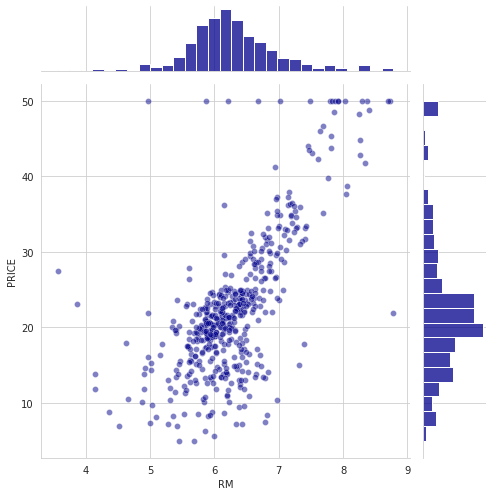

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=df_data.RM,y=df_data.PRICE,height=7,color='darkblue',joint_kws={'alpha':0.5})
plt.show()

In [ ]:
target = df_data['PRICE']
feature = df_data.drop('PRICE',axis=1)
x_tarin,x_test,y_tarin,y_test = train_test_split(feature,target,test_size=0.2,random_state=10)



In [ ]:
train_pct = 100*len(x_tarin)/len(feature)
print(f'taraing data is {train_pct:.3} % of total data')

test_pct = 100*x_test.shape[0]/feature.shape[0];
print(f'Test make up the reaming {test_pct:.3} % of total data')

taraing data is 79.8 % of total data
Test make up the reaming 20.2 % of total data


In [ ]:
regr = LinearRegression()
regr.fit(x_tarin,y_tarin)

rsquared = regr.score(x_tarin,y_tarin)

print(f'rsquared value is {rsquared:.2}')

rsquared value is 0.75


In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_,index=x_tarin.columns,columns=['Coefficient'])
regr_coef

,Coefficient
Unnamed: 0,-0.00
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.99
NOX,-16.25
RM,3.14
AGE,0.01
DIS,-1.50
RAD,0.32


In [ ]:
permium = regr_coef.loc['RM'].values[0]*1000
print(permium)

3136.2137877930313


In [ ]:
predicted_values = regr.predict(x_tarin)
residuals = (y_tarin-predicted_values)
residuals

50    -1.59
367   10.84
34    -0.48
78     0.14
172   -0.28
       ... 
320   -0.70
15    -0.35
484    1.49
125   -0.94
265   -5.60
Name: PRICE, Length: 404, dtype: float64

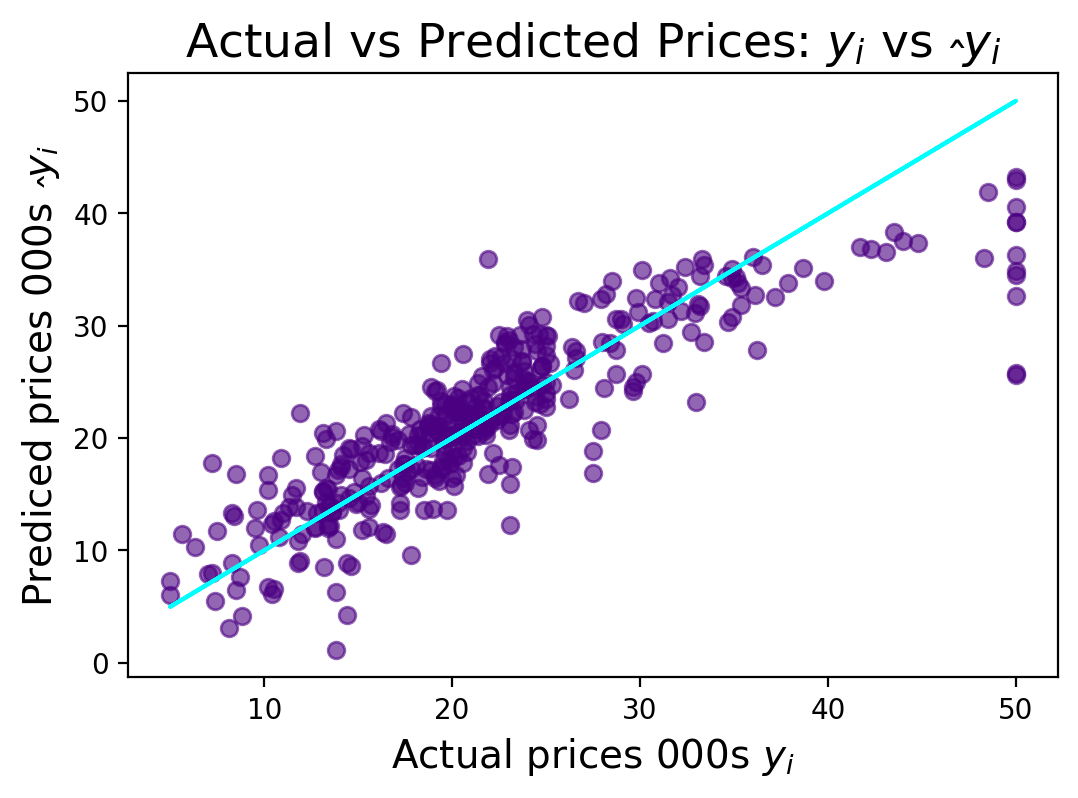

In [ ]:
plt.figure(dpi=200)
plt.scatter(x=y_tarin,y=predicted_values,c='indigo',alpha=0.6)
plt.plot(y_tarin,y_tarin,color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)

plt.show()

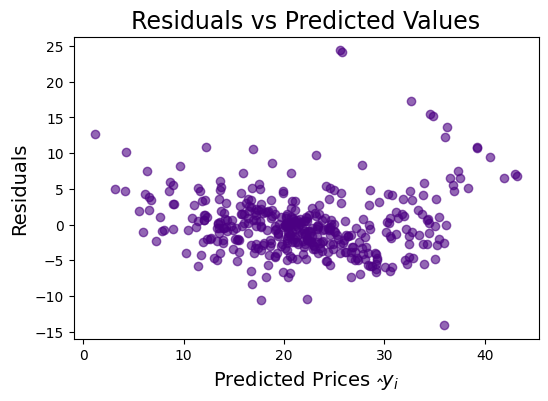

In [ ]:
plt.figure(dpi=100)
plt.scatter(x=predicted_values,y=residuals,c='indigo',alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

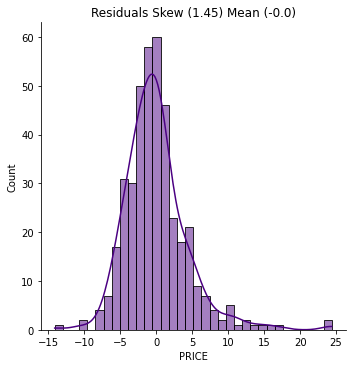

In [ ]:
resid_mean = round(residuals.mean(),2)
resid_skew = round(residuals.skew(),2)

sns.displot(residuals,kde=True,color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

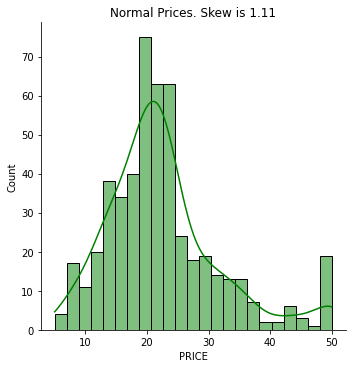

In [ ]:
tgt_skew = df_data['PRICE'].skew()
sns.displot(df_data['PRICE'],kde='kde',color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

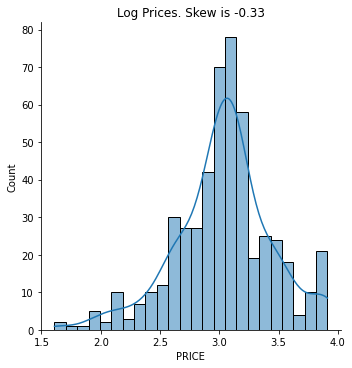

In [ ]:
y_log = np.log(df_data['PRICE'])
sns.displot(y_log,kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

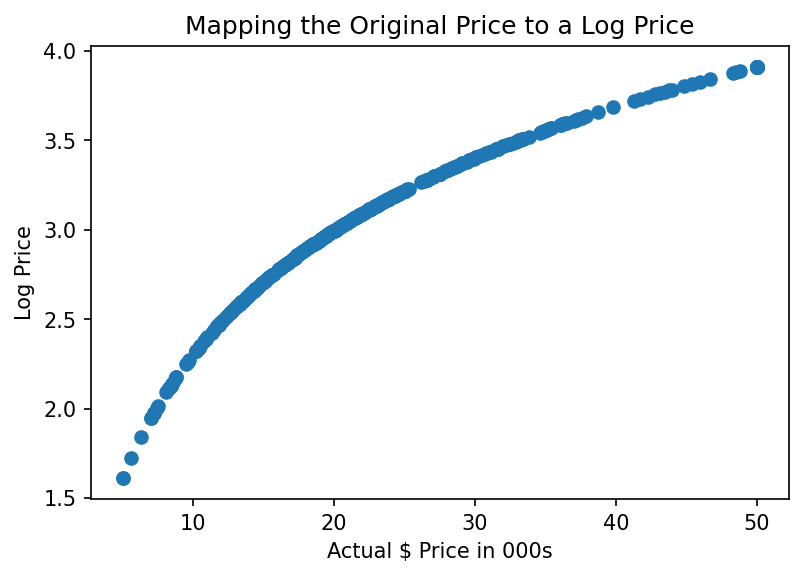

In [ ]:
plt.figure(dpi=150)
plt.scatter(df_data.PRICE,np.log(df_data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

In [ ]:
new_target = np.log(df_data['PRICE'])
feature = df_data.drop('PRICE',axis=1)

x_train,x_test,log_y_train,log_y_test = train_test_split(feature,new_target,test_size=0.2,random_state=10)

log_regr = LinearRegression()
log_regr.fit(x_train,log_y_train)
log_rsquared = log_regr.score(x_train,log_y_train)

log_predictions = log_regr.predict(x_train)
log_residuals = (log_y_train-log_predictions )

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_,index=x_train.columns,columns=['coef'])
df_coef

,coef
Unnamed: 0,-0.00
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.02


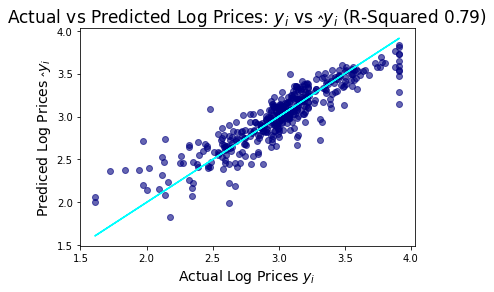

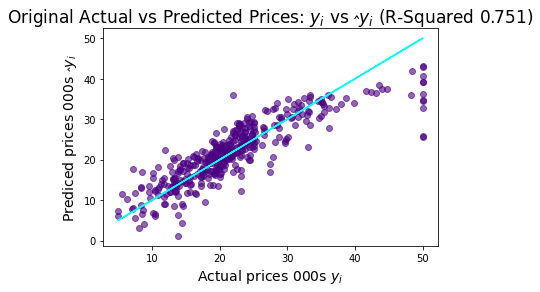

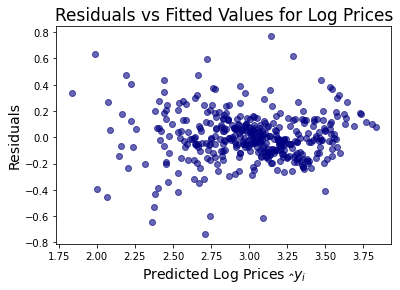

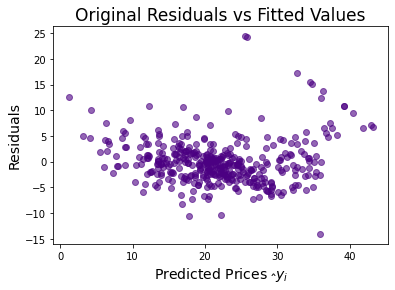

In [ ]:
plt.scatter(x=log_y_train,y=log_predictions,c='navy',alpha=0.6)
plt.plot(log_y_train,log_y_train,color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

plt.scatter(x=y_tarin,y=predicted_values,c='indigo',alpha=0.6)
plt.plot(y_tarin,y_tarin,color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

plt.scatter(x=log_predictions,y=log_residuals,c='navy',alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

plt.scatter(x=predicted_values,y=residuals,c='indigo',alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

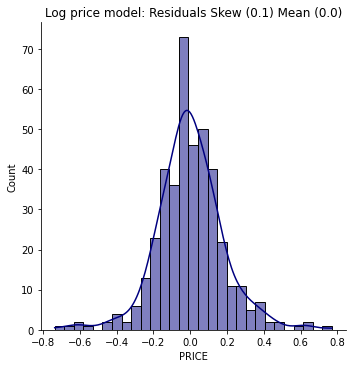

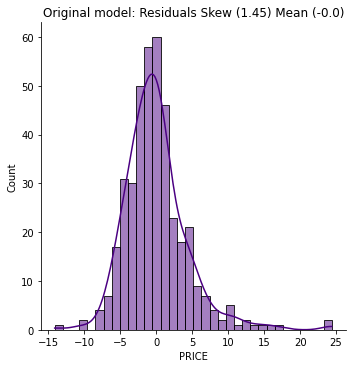

In [ ]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [ ]:
print(regr.score(x_test,y_test))
print(log_regr.score(x_test,log_y_test))

0.6718989387748704
0.745604949319398


In [ ]:
features = df_data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)

In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20696.9


In [ ]:
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = df_data.NOX.quantile(q=0.75) # high
amount_of_poverty =  df_data.LSTAT.quantile(q=0.25) # low

In [ ]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25819.9
